# Визализация в Python

## Попов Артём, кафедра ММП ВМК МГУ

Более подробную информацию о библиотеке matplotlib можно получить здесь:
http://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1%20Chapter%201%20Pyplot.ipynb


## Библиотека matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

### Немного об устройстве библиотеки

Библиотека matplotlib - это бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать высококачественные рисунки различных форматов.

Matplotlib cостоит из множества модулей. Модули наполнены различными классами и функциями, которые иерархически связаны между собой. matplotlib.pyplot предоставляет достоп к высокоуровневым интерфейсам.

Главной единицей (объектом самого высокого уровня) при работе с matplotlib является рисунок (Figure). Любой рисунок в matplotlib имеет вложенную структуру и чем-то напоминает матрёшку. Пользовательская работа подразумевает операции с разными уровнями этой матрёшки:

    Figure(Рисунок) -> Axes(Область рисования) -> Axis(Координатная ось)

* Рисунок (Figure) — объект самого верхнего уровня, на котором располагаются одна или несколько областей рисования (Axes), элементы рисунка Artisits (заголовки, легенда и т.д.) и основа-холст (Canvas). 

* Область рисования (Axes) — объект среднего уровня, главный объект работы с графикой. Это часть изображения с пространством данных. Каждая область рисования Axes содержит две (или три в случае трёхмерных данных) координатных оси (Axis объектов), которые упорядочивают отображение данных.

* Координатная ось (Axis) — объект среднего уровня, который определяет область изменения данных, на ось наносятся деления ticks и подписи к делениям ticklabels. 

* Элементы рисунка (Artists) — всё (почти), что отображается на рисунке является элементом рисунка (Artist). Элементы рисунка Artists включают в себя такие простые объекты как текст (Text), плоская линия (Line2D), фигура (Patch) и другие.

Рисунки в matplotlib создаются путём последовательного вызова команд: либо в интерактивном режиме (в консоли), либо в скрипте (текстовый файл с python-кодом). Графические элементы (точки, линии, фигуры и т.д.) наслаиваются одна на другую последовательно. При этом последующие перекрывают предыдущие, если они занимают общее участки на рисунке (регулируется параметром zorder).

В matplotlib работает правило "текущей области" ("current axes"), которое означает, что все графические элементы наносятся на текущую область рисования. Несмотря на то, что областей рисования может быть несколько, одна из них всегда является текущей.

### Мой первый график

In [2]:
x_values = np.array([x for x in np.linspace(-5, 5, 100)])
y_values = np.array([np.sin(x) for x in x_values])

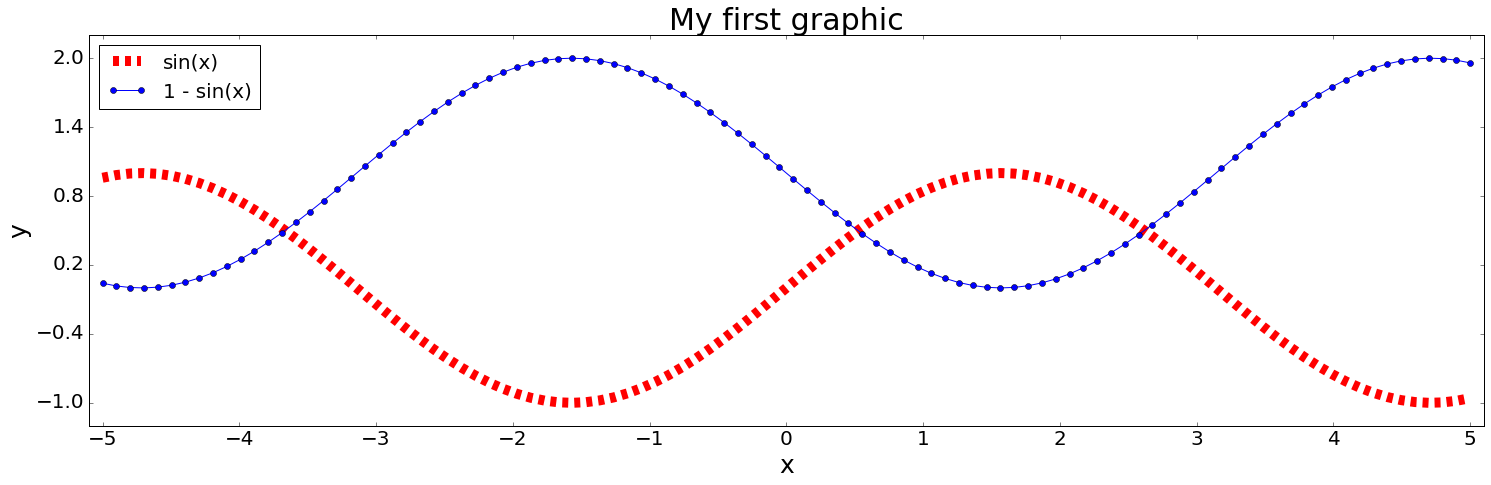

In [3]:
# создадим окружение
fig, ax = plt.subplots()

# зададим размеры рисунка
fig.set_figwidth(25)
fig.set_figheight(7)

# заголовок рисунка
plt.title('My first graphic', fontsize=30)

# добавим линии
plt.plot(x_values, y_values, 'r--', linewidth=10)
plt.plot(x_values, 1 - y_values, 'b-o')

# установить разметку осей
plt.xticks(np.linspace(-5, 5, 11), fontsize=20)
plt.yticks(np.linspace(-1, 2, 6), fontsize=20)

# установить границы осей
plt.xlim(-5.1, 5.1)
plt.ylim(-1.2, 2.2)

# подпишем оси
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)


# легенда
plt.legend(['sin(x)', '1 - sin(x)'], loc=2, fontsize=20)

# сохранить
#plt.savefig('fig.pdf')

### Несколько графиков в одном месте

In [4]:
x_values = np.array([x for x in np.linspace(-5, 5, 100)])

y_values = []

for i in range(1, 5):
    y_values.append(np.array([np.sin(x ** i) for x in x_values]))

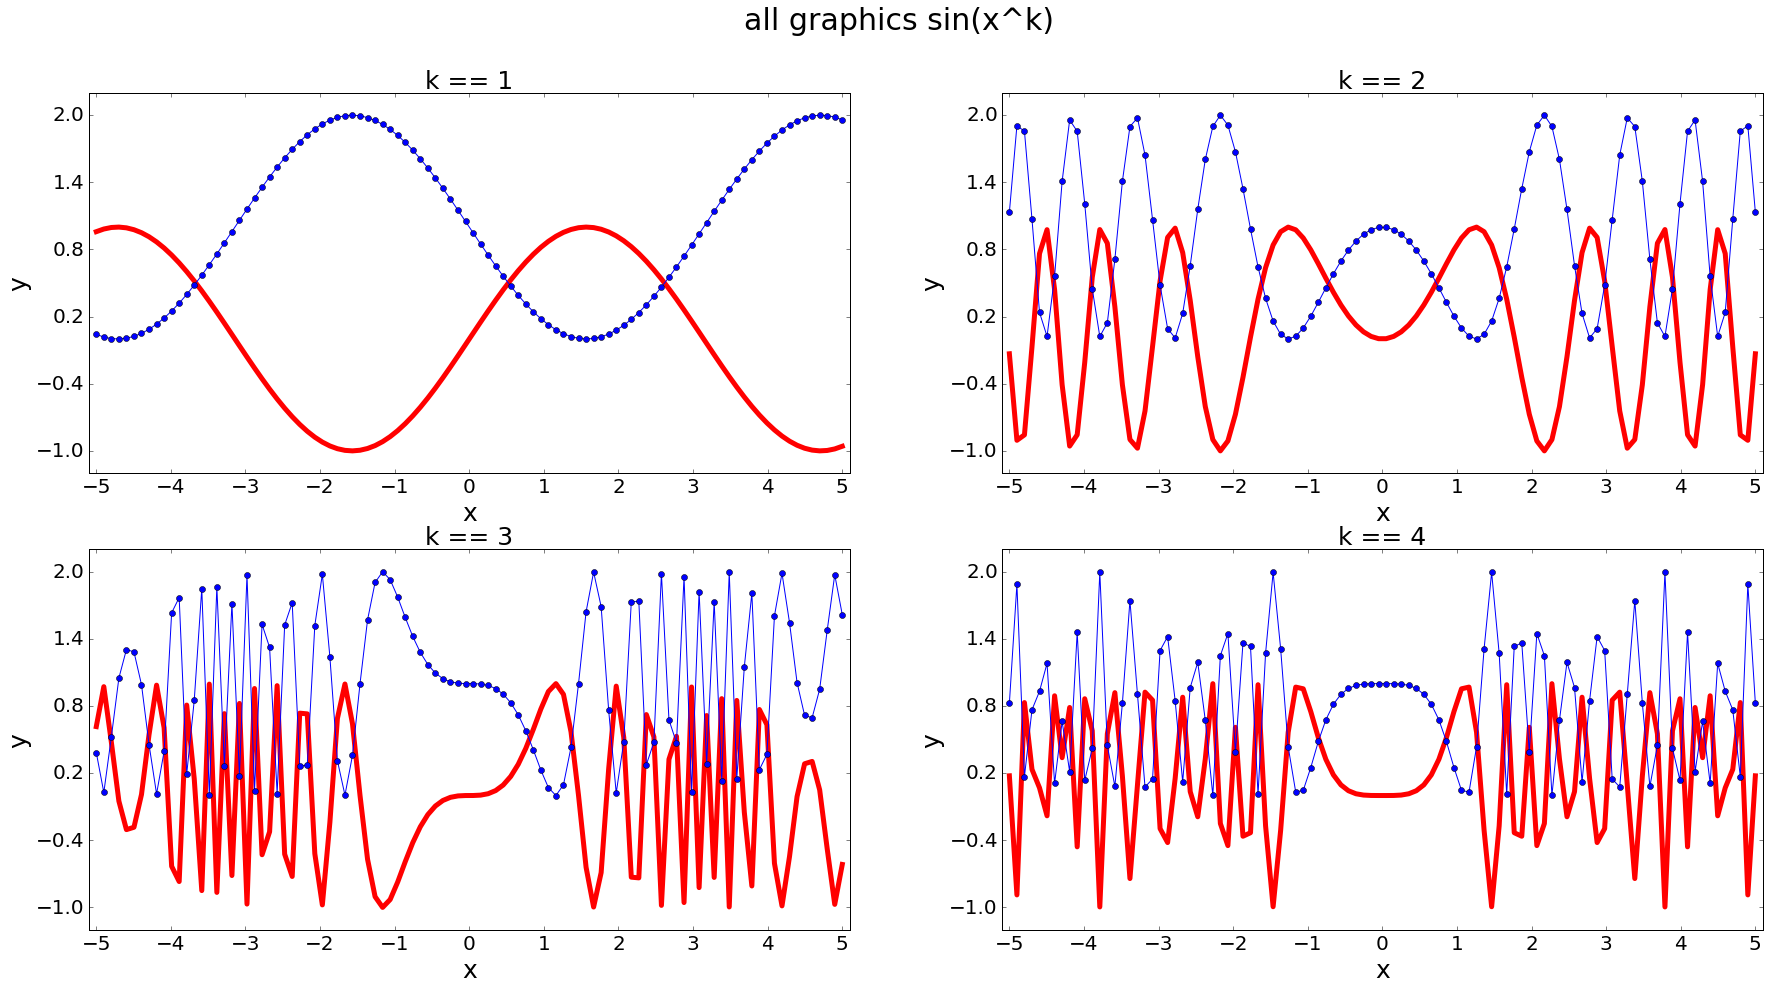

In [5]:
# создадим окружение
fig, ax = plt.subplots()

# зададим размеры рисунка
fig.set_figwidth(30)
fig.set_figheight(15)

# подпись ко всему
plt.suptitle('all graphics sin(x^k)', fontsize=30)


for i in range(1, 5):
    plt.subplot(2, 2, i)


    # заголовок рисунка
    plt.title('k == {}'.format(i), fontsize=25)
    # добавим линии
    plt.plot(x_values, y_values[i - 1], 'r', linewidth=5)
    plt.plot(x_values, 1 - y_values[i - 1], 'b-o')

    # установить разметку осей
    plt.xticks(np.linspace(-5, 5, 11), fontsize=20)
    plt.yticks(np.linspace(-1, 2, 6), fontsize=20)

    # установить границы осей
    plt.xlim(-5.1, 5.1)
    plt.ylim(-1.2, 2.2)

    # подпишем оси
    plt.xlabel('x', fontsize=25)
    plt.ylabel('y', fontsize=25)

### Другой способ с использованием ax

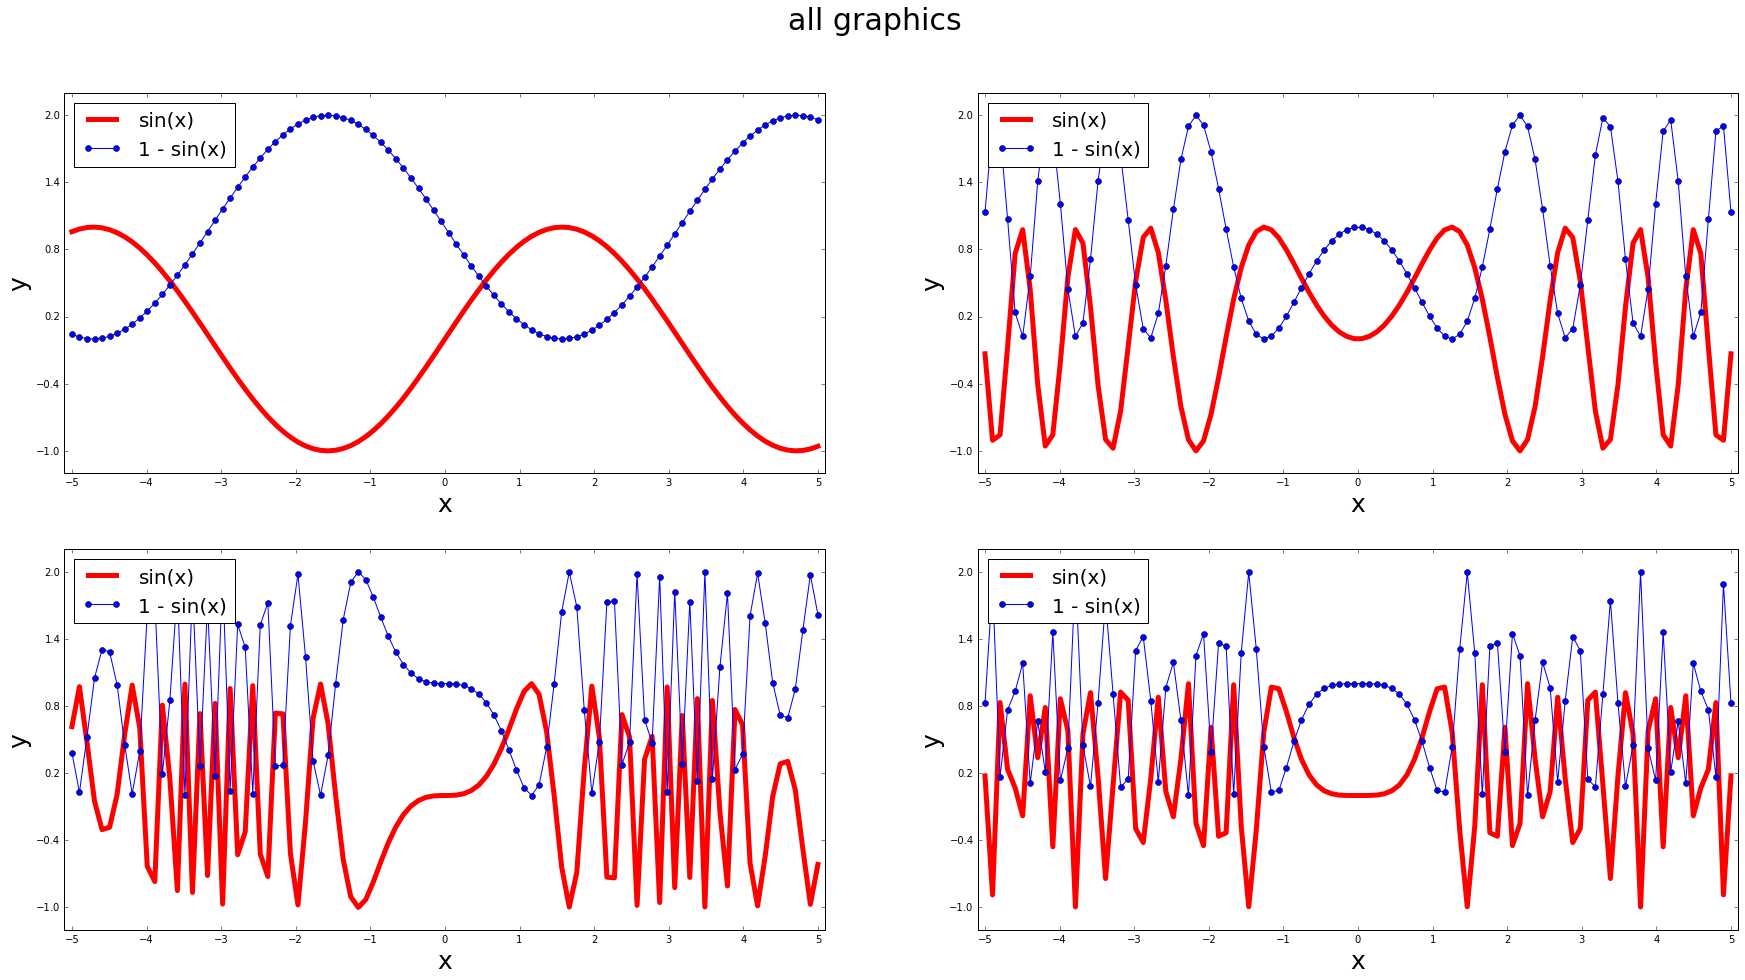

In [6]:
# создадим окружение
fig, ax = plt.subplots(2, 2)

# зададим размеры рисунка
fig.set_figwidth(30)
fig.set_figheight(15)

# подпись ко всему
plt.suptitle('all graphics', fontsize=30)

for i in range(2):
    for j in range(2):
        # заголовок рисунка
    #     ax[i, j].title(str)
        # добавим линии
        ax[i, j].plot(x_values, y_values[i * 2 + j], 'r', linewidth=5)
        ax[i, j].plot(x_values, 1 - y_values[i * 2 + j], 'b-o')

        # установить разметку осей
        ax[i, j].set_xticks(np.linspace(-5, 5, 11))
        ax[i, j].set_yticks(np.linspace(-1, 2, 6))

        # установить границы осей
        ax[i, j].set_xlim(-5.1, 5.1)
        ax[i, j].set_ylim(-1.2, 2.2)

        # подпишем оси
        ax[i, j].set_xlabel('x', fontsize=25)
        ax[i, j].set_ylabel('y', fontsize=25)


        # легенда
        ax[i, j].legend(['sin(x)', '1 - sin(x)'], loc=2, fontsize=20)

### Как построить график своей мечты?

Эксперементируем с matplotlib. Графики, у которых различаются оси $y$:

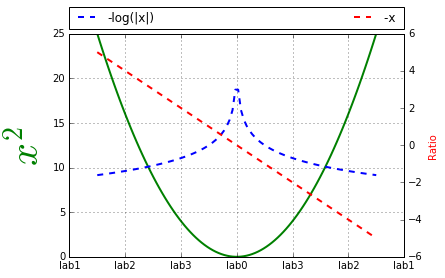

In [7]:
x_values = [x for x in np.linspace(-5, 5, 100)]
y1_values = [x ** 2 for x in x_values]

y2_values = [-np.log(np.abs(x)) for x in x_values]
y3_values = [-x for x in x_values]

fig, ax1 = plt.subplots()

ax1.plot(x_values, y1_values, 'g-', linewidth=2, label="Perplexity")
ax1.set_ylabel('$x^2$', color='g', fontsize=40)
ax1.set_xticklabels(['lab1', 'lab2', 'lab3', 'lab0', 'lab3', 'lab2', 'lab1'])

ax11 = ax1.twinx()
ax11.plot(x_values, y2_values, 'b--', linewidth=2, label="-log(|x|)")
ax11.plot(x_values, y3_values, 'r--', linewidth=2, label="-x ")
ax11.set_ylabel('Ratio', color='r')
ax11.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", borderaxespad=0.)

ax1.grid(True)
plt.show()

Графики с кириллицей:

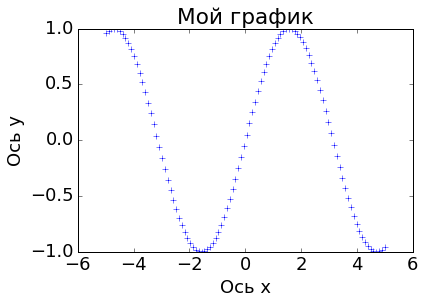

In [8]:
from matplotlib import rc

# или Verdana
font = {'family': 'DejaVu Sans',
        'weight': 'normal',
       'size':18}
rc('font', **font)

plt.xlabel(u'Ось x')
plt.ylabel(u'Ось y')
plt.title(u'Мой график')
plt.plot(x_values, y_values[0], '+')

#savefig('test_1.eps')

### Кроме графиков можно...

http://matplotlib.org/gallery.html


Например, строить гистограммы

In [9]:
new_x_values = np.random.normal(5, 10, size=10000)

(array([    5.,     7.,    19.,    19.,    58.,    75.,   158.,   222.,
          336.,   506.,   620.,   732.,   833.,   895.,  1000.,   895.,
          868.,   753.,   619.,   464.,   342.,   220.,   149.,   103.,
           53.,    20.,    21.,     3.,     2.,     3.]),
 array([-30.38338277, -27.95038157, -25.51738037, -23.08437916,
        -20.65137796, -18.21837676, -15.78537556, -13.35237435,
        -10.91937315,  -8.48637195,  -6.05337074,  -3.62036954,
         -1.18736834,   1.24563287,   3.67863407,   6.11163527,
          8.54463647,  10.97763768,  13.41063888,  15.84364008,
         18.27664129,  20.70964249,  23.14264369,  25.5756449 ,
         28.0086461 ,  30.4416473 ,  32.87464851,  35.30764971,
         37.74065091,  40.17365211,  42.60665332]),
 <a list of 30 Patch objects>)

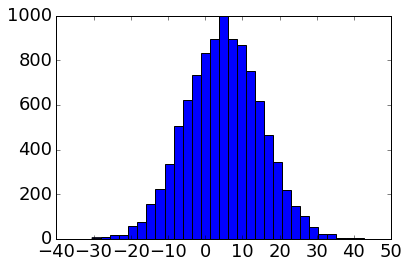

In [10]:
plt.hist(new_x_values, bins=30)